Not in test: 543
In test: 0


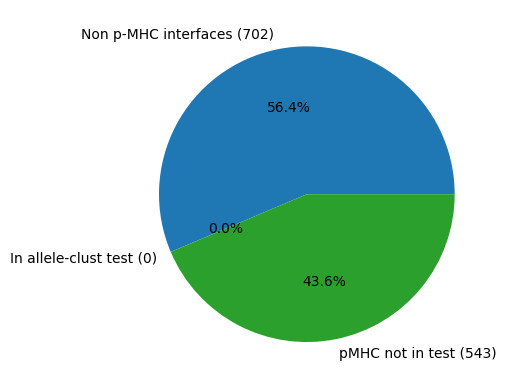

In [9]:
import pandas as pd
import torch, pickle
from matplotlib import pyplot as plt

db = torch.load('propedia_residue_mhc_1.pt')
db_info = pickle.load(open('propedia_alleles.pkl', 'rb'))

test_cases = '/projects/0/einf2380/data/external/processed/I/experiments/BA_pMHCI_human_quantitative_only_eq_pseudoseq_clustered_test.csv'
#test_cases = '/projects/0/einf2380/data/external/processed/I/clusters/BA_pMHCI_human_quantitative_only_eq_alleleclusters_pseudoseq.csv'
#test_cases = '/projects/0/einf2380/data/external/processed/I/BA_pMHCI_human_quantitative_only_eq_alleleclusters.csv'
tdf = pd.read_csv(test_cases)
test_alleles = set(tdf['allele'][tdf['allele_clustering']==1])

no_test=0
in_test=0
ids_for_training = []
for pdb in db_info:
    if any(x[0] in test_alleles for x in db_info[pdb]['allele']):
        in_test += 1
    else:
        no_test += 1
        ids_for_training.append(f'{pdb}_{list(db_info[pdb].keys())[0]}_{list(db_info[pdb].keys())[1]}')
print(f'Not in test: {no_test}')
print(f'In test: {in_test}')

sizes = [len(db)-len(db_info), in_test, no_test]
labels = [f'Non p-MHC interfaces ({sizes[0]})', f'In allele-clust test ({sizes[1]})', f'pMHC not in test ({sizes[2]})']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

with open('only_pmhc.txt', 'w') as outfile:
    for x in ids_for_training:
        outfile.write(x + '\n')
    


        